# Data

In [120]:
import pandas as pd
import numpy as np
from dataprep.eda import create_report
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv("data/life_expectancy_data.csv")

## Explore life expectancy trends

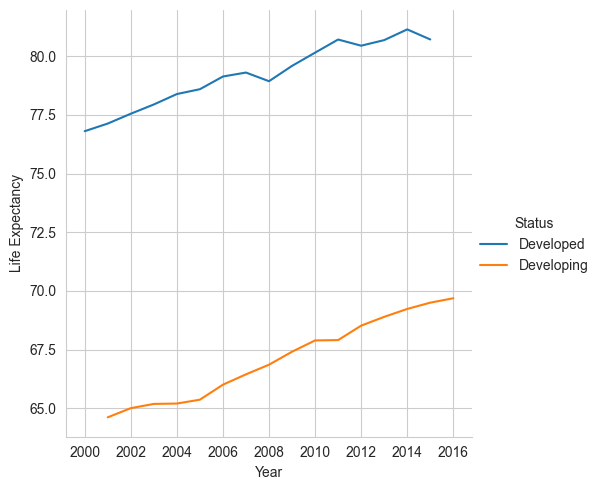

In [122]:
a = df.groupby(['Year','Status']).mean()["Life expectancy "]

year = []
developed = []
life = []

y = 2000
sum = 0

for i in a:
    if(sum % 2 != 0):
        year.append(y)
        developed.append("Developing")
        life.append(i)
    else:
        year.append(y)
        y = y + 1
        developed.append("Developed")
        life.append(i)
    sum = sum + 1

a = pd.DataFrame(list(zip(year, developed, life)), columns= ['Year', "Status", 'Life Expectancy'])

sns.relplot(
    data=a, kind="line",
    x="Year", y="Life Expectancy", hue="Status")
plt.show()

### Basic Cleaning

In [123]:
from dataprep.clean import clean_headers, clean_country

df = clean_headers(df)
df = clean_country(df, "country")
df["developed"] = np.where(df["status"] == "Developed", 1, 0)
df["country"] = df["country_clean"]
df.insert(df.shape[1]-1, 'life_expectancy', df.pop('life_expectancy'))
df.drop(columns=['status', 'country_clean'], inplace= True)

df

Column Headers Cleaning Report:
	22 values cleaned (100.0%)


  0%|          | 0/9 [00:00<?, ?it/s]

Country Cleaning Report:
	369 values cleaned (12.56%)
Result contains 2938 (100.0%) values in the correct format and 0 null values (0.0%)


,country,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,...,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,developed,life_expectancy
0,Afghanistan,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,65.0
1,Afghanistan,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,59.9
2,Afghanistan,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,59.9
3,Afghanistan,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,59.5
4,Afghanistan,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,44.3
2934,Zimbabwe,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,44.5
2935,Zimbabwe,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,44.8
2936,Zimbabwe,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,45.3


# Preprocessing
### EDA

In [5]:
report = create_report(df)
report.show_browser()

  0%|          | 0/4620 [00:00<?, ?it/s]

## Missing Values
### Identify missing values
1. infant deaths: if a developing country has a value of 0 or if the value is larger than 1000
2. percentage expenditure: has a value of 0
3. measles: if a developing country has a value of 0 or if the value is larger than 1000
4. under-five deaths: if a developing country has a value of 0 or if the value is larger than 1000

### Drop samples missing y
- 10 entry's life expectancy is missing, drop them

In [124]:
nan = np.nan

# 1
df['infant_deaths'].mask( (df['infant_deaths'] > 1000) | ((df['infant_deaths'] == 0) & (df["developed"] == 0)), nan, inplace=True)

# 2
df['percentage_expenditure'].mask( df['percentage_expenditure'] == 0, nan, inplace=True)

# 3
df['measles'].mask( (df['measles'] > 1000) | ((df['measles'] == 0) & (df["developed"] == 0)), nan, inplace=True)

# 4
df['under_five_deaths'].mask( (df['under_five_deaths'] > 1000) | ((df['under_five_deaths'] == 0) & (df["developed"] == 0)), nan, inplace=True)

# 5
df.dropna(subset=['life_expectancy'], inplace=True)

df

,country,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,...,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,developed,life_expectancy
0,Afghanistan,2015,263.0,62.0,0.01,71.279624,65.0,NaN,19.1,83.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,65.0
1,Afghanistan,2014,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,59.9
2,Afghanistan,2013,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,59.9
3,Afghanistan,2012,272.0,69.0,0.01,78.184215,67.0,NaN,17.6,93.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,59.5
4,Afghanistan,2011,275.0,71.0,0.01,7.097109,68.0,NaN,17.2,97.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,723.0,27.0,4.36,NaN,68.0,31.0,27.1,42.0,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,44.3
2934,Zimbabwe,2003,715.0,26.0,4.06,NaN,7.0,998.0,26.7,41.0,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,44.5
2935,Zimbabwe,2002,73.0,25.0,4.43,NaN,73.0,304.0,26.3,40.0,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,44.8
2936,Zimbabwe,2001,686.0,25.0,1.72,NaN,76.0,529.0,25.9,39.0,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,45.3


In [ ]:
report = create_report(df)
report.show_browser()

In [125]:
df.drop(columns=["under_five_deaths", "percentage_expenditure", "thinness_5_9_years", "income_composition_of_resources"], inplace=True)

# Impute missing values

In [109]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['life_expectancy', "country"]), df[["country",'life_expectancy']], test_size=0.3, random_state=0)

col = x_train.columns

In [110]:
# Scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

# Imputation
imputer = KNNImputer(n_neighbors=16, weights="uniform")
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [111]:
x_train = pd.DataFrame(x_train,
                   columns=col)
x_test = pd.DataFrame(x_test,
                   columns=col)

## Data after preprocessing

In [18]:
report = create_report(x_train)
report.show_browser()

  0%|          | 0/3289 [00:00<?, ?it/s]

# Model Training
## Base Line -- linear regression

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regr = LinearRegression().fit(x_train, y_train["life_expectancy"])

yHat = regr.predict(x_train)
a = mean_squared_error(y_train["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_train["life_expectancy"], yHat)
print(a)


yHat = regr.predict(x_test)
a = mean_squared_error(y_test["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_test["life_expectancy"], yHat)
print(a)

4.099259245625784
0.8132764115068367
4.063549203665026
0.8209656479737294


Feature: year, Score: -0.07551
Feature: adult_mortality, Score: -13.29826
Feature: infant_deaths, Score: -5.72947
Feature: alcohol, Score: -0.14895
Feature: hepatitis_b, Score: -0.26540
Feature: measles, Score: -0.29861
Feature: bmi, Score: 2.57963
Feature: polio, Score: 2.91189
Feature: total_expenditure, Score: 0.36457
Feature: diphtheria, Score: 3.56658
Feature: hiv_aids, Score: -25.14655
Feature: gdp, Score: 7.24823
Feature: population, Score: 3.21744
Feature: thinness_1_19_years, Score: -2.11049
Feature: schooling, Score: 21.69752
Feature: developed, Score: 1.21266


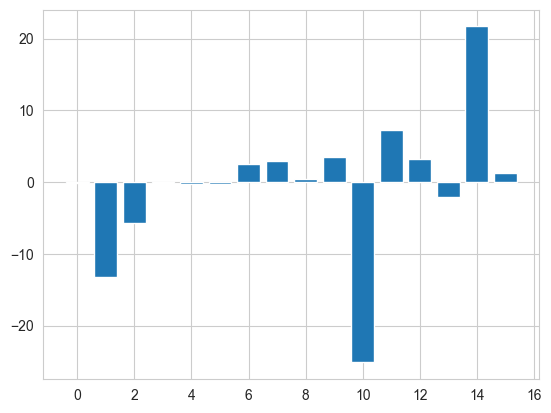

In [113]:
from matplotlib import pyplot
# get importance
importance = regr.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %s, Score: %.5f' % (col[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## LR with Regularization

In [115]:
from sklearn import linear_model

for i in [0.5, 0.3, 0.1, 0.01, 0.001]:
    regr = linear_model.Lasso(alpha=i).fit(x_train, y_train["life_expectancy"])

# for i in [0, 1, 2, 3, 4, 5, 10]:
#     regr = linear_model.Ridge(alpha=i).fit(x_train, y_train["life_expectancy"])

    yHat = regr.predict(x_test)
    a = mean_squared_error(y_test["life_expectancy"], yHat)**(0.5)
    print(a)
    a = r2_score(y_test["life_expectancy"], yHat)
    print(a)

5.923678380438476
0.6195406469470681
5.129870458448461
0.7146761209565543
4.270137980469661
0.8022988751535303
4.068013773989096
0.8205720262840804
4.063472696611162
0.8209723895000074


4.270137980469661
0.8022988751535303
Feature: year, Score: 0.00000
Feature: adult_mortality, Score: -14.18805
Feature: infant_deaths, Score: -0.00000
Feature: alcohol, Score: 0.00000
Feature: hepatitis_b, Score: 0.00000
Feature: measles, Score: -0.00000
Feature: bmi, Score: 3.81465
Feature: polio, Score: 2.66524
Feature: total_expenditure, Score: 0.00000
Feature: diphtheria, Score: 3.34105
Feature: hiv_aids, Score: -16.31398
Feature: gdp, Score: 0.27523
Feature: population, Score: -0.00000
Feature: thinness_1_19_years, Score: -0.00114
Feature: schooling, Score: 20.30099
Feature: developed, Score: 2.43886


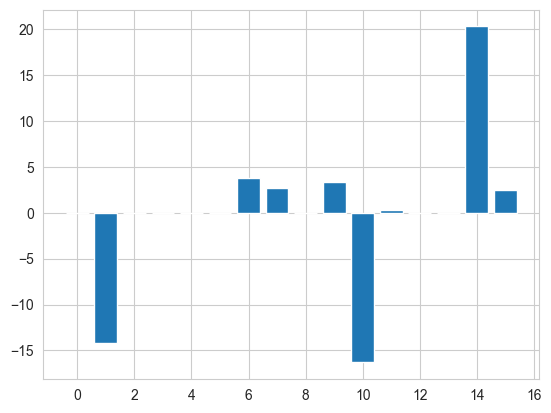

In [116]:
regr = linear_model.Lasso(alpha=0.1).fit(x_train, y_train["life_expectancy"])

yHat = regr.predict(x_test)
a = mean_squared_error(y_test["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_test["life_expectancy"], yHat)
print(a)

# get importance
importance = regr.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %s, Score: %.5f' % (col[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Random Forest

In [117]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=10, random_state=0).fit(x_train, y_train["life_expectancy"])

yHat = regr.predict(x_test)
a = mean_squared_error(y_test["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_test["life_expectancy"], yHat)
print(a)

2.1064671293188324
0.951890073192603


In [374]:
from sklearn.model_selection import GridSearchCV

regr = GridSearchCV(
    RandomForestRegressor(),
    [{'n_estimators': range(100, 600, 100), 'max_depth': range(3, 15, 4), 'min_samples_leaf':  range(5, 40, 10)}], cv=10, scoring='r2')
regr.fit(x_train, y_train['life_expectancy'])


results = pd.DataFrame(regr.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)


print(regr.best_params_)

{'max_depth': 11, 'min_samples_leaf': 5, 'n_estimators': 500}


In [375]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
44,3.354679,0.100955,0.029647,0.001067,11,5,500,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.952234,0.959358,...,0.947196,0.951875,0.947267,0.930425,0.942671,0.964932,0.953306,0.951477,0.010004,1
42,2.045075,0.108070,0.018390,0.000615,11,5,300,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.951647,0.958862,...,0.948125,0.951998,0.947109,0.929275,0.942529,0.965496,0.953221,0.951412,0.010317,2
41,1.335824,0.017882,0.012845,0.000571,11,5,200,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.951162,0.958406,...,0.947674,0.950941,0.948241,0.931712,0.940127,0.964051,0.955179,0.951324,0.009840,3
43,2.656280,0.042525,0.024559,0.001473,11,5,400,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.951127,0.959775,...,0.947992,0.951617,0.946827,0.930892,0.941687,0.964081,0.951354,0.951110,0.009918,4
40,0.677254,0.012926,0.007261,0.000496,11,5,100,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.951743,0.959503,...,0.946879,0.951355,0.946598,0.927592,0.939503,0.962739,0.954626,0.950608,0.010725,5
22,1.678039,0.077552,0.018231,0.003491,7,5,300,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.941158,0.947243,...,0.935915,0.940558,0.931915,0.921401,0.935970,0.952213,0.944510,0.941101,0.010300,6
20,0.589726,0.029544,0.006874,0.000271,7,5,100,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.940360,0.950553,...,0.934568,0.941477,0.928755,0.920010,0.935982,0.952353,0.945526,0.941080,0.011431,7
24,2.707322,0.023423,0.027238,0.000467,7,5,500,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.941511,0.948844,...,0.934855,0.940730,0.931135,0.921737,0.936115,0.951106,0.944684,0.941059,0.010313,8
23,2.234910,0.119566,0.022339,0.001348,7,5,400,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.940760,0.947922,...,0.936719,0.939877,0.931767,0.921362,0.935681,0.951459,0.943865,0.940949,0.010239,9
21,1.166240,0.031362,0.012339,0.000863,7,5,200,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.941538,0.947461,...,0.935674,0.940232,0.931151,0.920782,0.936243,0.951065,0.945231,0.940884,0.010293,10


In [118]:
regr = RandomForestRegressor(max_depth=11, min_samples_leaf=5, n_estimators=500, random_state=0).fit(x_train, y_train["life_expectancy"])

yHat = regr.predict(x_test)
a = mean_squared_error(y_test["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_test["life_expectancy"], yHat)
print(a)

2.1706104390516696
0.9489155057843789


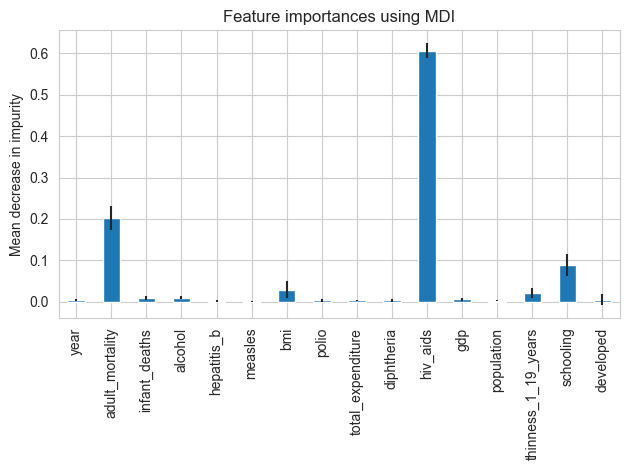

In [119]:
import matplotlib.pyplot as plt

importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)

forest_importances = pd.Series(importances, index=col)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

## XGboost

In [379]:
import xgboost as xg

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(x_train, y_train["life_expectancy"])

# Predict the model
pred = xgb_r.predict(x_test)

mse = mean_squared_error(y_test["life_expectancy"], pred)**(0.5)
print(mse)
a = r2_score(y_test["life_expectancy"], pred)
print(a)

3.3224281217386196
0.8803158853940382


In [380]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = xg.XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)


    results_xg = pd.DataFrame(gsearch.cv_results_)
    results_xg.sort_values(by='rank_test_score', inplace=True)

    return gsearch.best_params_

In [382]:
hyperParameterTuning(x_train, y_train['life_expectancy'])

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [83]:
# Instantiation
xgb_model = xg.XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.1,
        max_depth = 7,
        min_child_weight = 3,
        n_estimators = 500,
        subsample = 0.7)

# Fitting the model
xgb_model.fit(x_train, y_train["life_expectancy"], verbose=False)

# Predict the model
pred = xgb_model.predict(x_test)

mse = mean_squared_error(y_test["life_expectancy"], pred)**(0.5)
print(mse)
a = r2_score(y_test["life_expectancy"], pred)
print(a)

2.072378049421742
0.953434605097502


Text(0.5, 0, 'Xgboost Feature Importance')

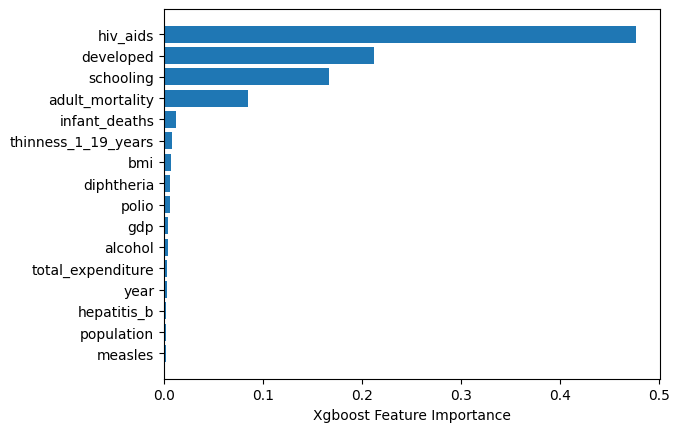

In [386]:
from matplotlib import pyplot as plt

sorted_idx = xgb_model.feature_importances_.argsort()
plt.barh(col[sorted_idx], xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

# Developing Countries
## Preprocessing

In [126]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split
developing_df = df.loc[df['developed'] == 0]

x_train, x_test, y_train, y_test = train_test_split(developing_df.drop(columns=['life_expectancy', "country",'developed']), developing_df[["country",'life_expectancy']], test_size=0.3, random_state=0)

col = x_train.columns

# Scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

# Imputation
imputer = KNNImputer(n_neighbors=16, weights="uniform")
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

x_train = pd.DataFrame(x_train,
                   columns=col)
x_test = pd.DataFrame(x_test,
                   columns=col)

In [32]:
report = create_report(x_train)
report.show_browser()

  0%|          | 0/3194 [00:00<?, ?it/s]

In [93]:
x_train

,year,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,schooling
0,0.666667,0.118715,0.002200,0.654535,0.653061,0.090994,0.066580,1.000000,0.804606,1.000000,0.000000,0.005303,0.005533,0.018116,0.883978
1,0.666667,0.405028,0.030803,0.010638,0.642857,0.044088,0.023499,0.614583,0.310550,0.639175,0.041584,0.004913,0.000152,0.293478,0.458564
2,0.466667,0.617318,0.066007,0.143897,0.765306,0.004008,0.289817,0.750000,0.444279,0.762887,0.102970,0.005104,0.004791,0.242754,0.379144
3,0.200000,0.055866,0.622662,0.545353,0.447704,0.242673,0.225849,0.406250,0.306835,0.278351,0.104950,0.005747,0.111871,0.485507,0.447514
4,0.066667,0.053073,0.045105,0.082867,0.592474,0.353958,0.014360,0.812500,0.236999,0.793814,0.067327,0.003048,0.001646,0.322464,0.441989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,0.400000,0.265363,0.173817,0.002800,0.663265,0.217310,0.244125,0.781250,0.188707,0.721649,0.000000,0.017870,0.019483,0.061594,0.602210
1687,0.800000,0.243017,0.000000,0.597424,0.948980,0.010020,0.659269,0.927083,0.854383,0.927835,0.000000,0.057475,0.012573,0.094203,0.708564
1688,0.266667,0.493017,0.237624,0.047592,0.287628,0.072144,0.163185,0.531250,0.286776,0.020619,0.079208,0.001491,0.006326,0.413043,0.298343
1689,0.800000,0.374302,0.002200,0.000000,0.989796,0.131889,0.318538,0.989583,0.427192,0.989691,0.025743,0.009437,0.007793,0.278986,0.486188


## Models
same as all data part

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regr = LinearRegression().fit(x_train, y_train["life_expectancy"])

yHat = regr.predict(x_train)
a = mean_squared_error(y_train["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_train["life_expectancy"], yHat)
print(a)


yHat = regr.predict(x_test)
a = mean_squared_error(y_test["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_test["life_expectancy"], yHat)
print(a)

4.1386769115846205
0.791603864306966
4.359957835591025
0.7570280746206549


Feature: year, Score: -0.43363
Feature: adult_mortality, Score: -12.34503
Feature: infant_deaths, Score: -5.13902
Feature: alcohol, Score: 0.57054
Feature: hepatitis_b, Score: -0.42306
Feature: measles, Score: -1.02371
Feature: bmi, Score: 3.94225
Feature: polio, Score: 2.13437
Feature: total_expenditure, Score: 1.32114
Feature: diphtheria, Score: 3.74488
Feature: hiv_aids, Score: -26.56279
Feature: gdp, Score: 7.61561
Feature: population, Score: -0.60532
Feature: thinness_1_19_years, Score: 0.00502
Feature: schooling, Score: 19.46753


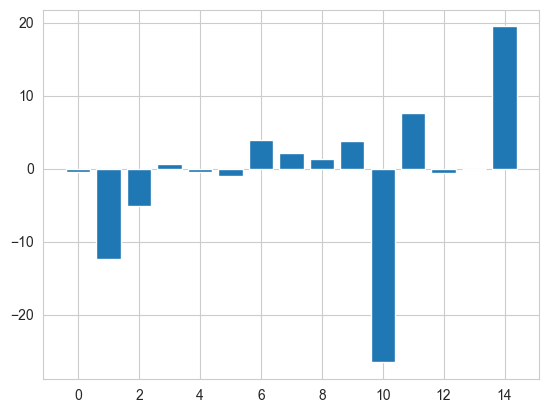

In [34]:
from matplotlib import pyplot
# get importance
importance = regr.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %s, Score: %.5f' % (col[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## LR with Regularization

In [54]:
from sklearn import linear_model

# for i in [0.5, 0.3, 0.1, 0.01, 0.001]:
#     regr = linear_model.Lasso(alpha=i).fit(x_train, y_train["life_expectancy"])

for i in [0, 1, 2, 3, 4, 5, 10]:
    regr = linear_model.Ridge(alpha=i).fit(x_train, y_train["life_expectancy"])

    yHat = regr.predict(x_test)
    a = mean_squared_error(y_test["life_expectancy"], yHat)**(0.5)
    print(a)
    a = r2_score(y_test["life_expectancy"], yHat)
    print(a)

4.3599578355910245
0.7570280746206549
4.353163040366287
0.7577848058000486
4.352922540030158
0.7578115685130118
4.357233232783224
0.7573316533099875
4.364786995699189
0.7564895372381129
4.374692231464528
0.7553830615188536
4.44271476473106
0.7477167721875461


4.352922540030158
0.7578115685130118
Feature: year, Score: -0.13404
Feature: adult_mortality, Score: -12.85499
Feature: infant_deaths, Score: -4.26670
Feature: alcohol, Score: 0.73949
Feature: hepatitis_b, Score: -0.34721
Feature: measles, Score: -1.21906
Feature: bmi, Score: 4.41010
Feature: polio, Score: 2.31832
Feature: total_expenditure, Score: 0.99676
Feature: diphtheria, Score: 3.85287
Feature: hiv_aids, Score: -23.78126
Feature: gdp, Score: 6.84035
Feature: population, Score: -0.13883
Feature: thinness_1_19_years, Score: -0.37737
Feature: schooling, Score: 18.14733


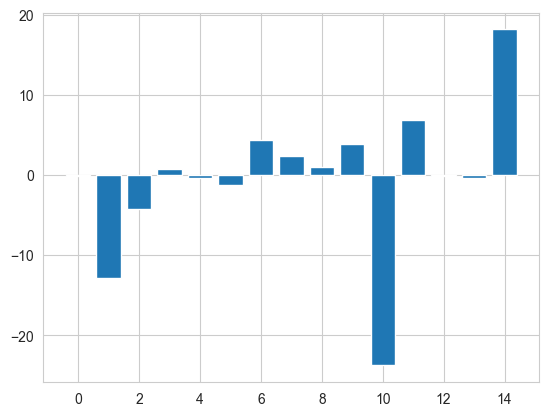

In [55]:
regr = linear_model.Ridge(alpha=2).fit(x_train, y_train["life_expectancy"])

yHat = regr.predict(x_test)
a = mean_squared_error(y_test["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_test["life_expectancy"], yHat)
print(a)

# get importance
importance = regr.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %s, Score: %.5f' % (col[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=10, random_state=0).fit(x_train, y_train["life_expectancy"])

yHat = regr.predict(x_test)
a = mean_squared_error(y_test["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_test["life_expectancy"], yHat)
print(a)

2.204027138857921
0.9379094663927023


In [41]:
from sklearn.model_selection import GridSearchCV

regr = GridSearchCV(
    RandomForestRegressor(),
    [{'n_estimators': range(100, 600, 100), 'max_depth': range(3, 15, 4), 'min_samples_leaf':  range(5, 40, 10)}], cv=10, scoring='r2')
regr.fit(x_train, y_train['life_expectancy'])


results = pd.DataFrame(regr.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)


print(regr.best_params_)

{'max_depth': 11, 'min_samples_leaf': 5, 'n_estimators': 400}


In [42]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
43,2.176941,0.011618,0.021703,0.000140,11,5,400,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.939845,0.940508,...,0.946056,0.932332,0.926062,0.934057,0.960754,0.945583,0.920419,0.939382,0.011110,1
44,2.725707,0.018118,0.027257,0.000636,11,5,500,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.940628,0.941356,...,0.944900,0.931504,0.925455,0.934230,0.961689,0.945821,0.920041,0.939379,0.011440,2
41,1.117061,0.029579,0.012228,0.000699,11,5,200,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.941136,0.939944,...,0.945209,0.931350,0.925103,0.935825,0.961450,0.944439,0.919202,0.939233,0.011508,3
42,1.706447,0.069677,0.017161,0.000811,11,5,300,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.939003,0.940209,...,0.944581,0.931871,0.926502,0.934194,0.961333,0.944458,0.921777,0.939198,0.010815,4
40,0.550198,0.006205,0.006419,0.000095,11,5,100,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.939882,0.937911,...,0.944236,0.931180,0.927857,0.934008,0.960395,0.945641,0.918914,0.939039,0.011288,5
23,1.987349,0.083295,0.040129,0.055603,7,5,400,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.934087,0.925540,...,0.938026,0.920335,0.913894,0.924798,0.946347,0.938598,0.905854,0.929218,0.012709,6
21,0.938422,0.007843,0.010997,0.000295,7,5,200,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.935172,0.926147,...,0.938015,0.918757,0.913350,0.924227,0.947071,0.938205,0.905929,0.929202,0.013054,7
24,2.442802,0.108835,0.026263,0.000964,7,5,500,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.934142,0.925646,...,0.937335,0.918848,0.912626,0.924853,0.947866,0.938172,0.906234,0.928972,0.012957,8
22,1.420261,0.028171,0.015962,0.000378,7,5,300,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.934159,0.925739,...,0.937287,0.920161,0.912603,0.923966,0.946642,0.938462,0.904449,0.928796,0.013119,9
20,0.468926,0.004547,0.006295,0.000256,7,5,100,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.934626,0.922958,...,0.936803,0.918374,0.912528,0.924865,0.944787,0.937568,0.903914,0.928046,0.013036,10


In [63]:
regr = RandomForestRegressor(max_depth=11, min_samples_leaf=5, n_estimators=400, random_state=0).fit(x_train, y_train["life_expectancy"])

yHat = regr.predict(x_test)
a = mean_squared_error(y_test["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_test["life_expectancy"], yHat)
print(a)

2.245102800438689
0.9355735829225753


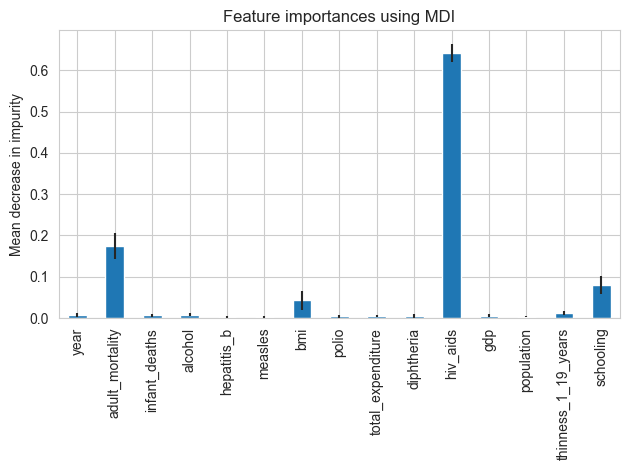

In [64]:
import matplotlib.pyplot as plt

importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)

forest_importances = pd.Series(importances, index=col)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

## XGboost

In [46]:
import xgboost as xg

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(x_train, y_train["life_expectancy"])

# Predict the model
pred = xgb_r.predict(x_test)

mse = mean_squared_error(y_test["life_expectancy"], pred)**(0.5)
print(mse)
a = r2_score(y_test["life_expectancy"], pred)
print(a)

3.202623815614413
0.8688997939429088


In [47]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = xg.XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)


    results_xg = pd.DataFrame(gsearch.cv_results_)
    results_xg.sort_values(by='rank_test_score', inplace=True)

    return gsearch.best_params_

In [48]:
hyperParameterTuning(x_train, y_train['life_expectancy'])

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [127]:
# Instantiation
xgb_model = xg.XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.1,
        max_depth = 5,
        min_child_weight = 5,
        n_estimators = 500,
        subsample = 0.7)

# Fitting the model
xgb_model.fit(x_train, y_train["life_expectancy"], verbose=False)

# Predict the model
pred = xgb_model.predict(x_test)

mse = mean_squared_error(y_test["life_expectancy"], pred)**(0.5)
print(mse)
a = r2_score(y_test["life_expectancy"], pred)
print(a)

1.976790844724582
0.9500525916566019


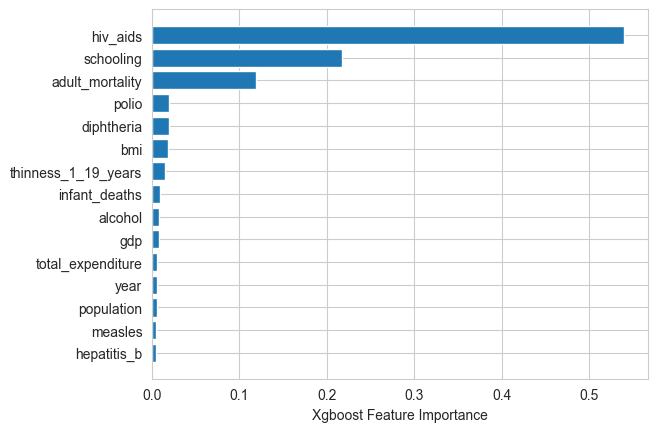

In [128]:
from matplotlib import pyplot as plt

sorted_idx = xgb_model.feature_importances_.argsort()
plt.barh(col[sorted_idx], xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

plt.show()